In [1]:
import pandas as pd
df = pd.read_excel(r"C:\Users\maadh\OneDrive\Desktop\2nd year\excel_ca2_project.xlsx", sheet_name="Transactions")
mean_price = df['unit_price'].mean()
median_price = df['unit_price'].median()
mode_price = df['unit_price'].mode().iloc[0]
print(" Central Tendencies for Unit Price:")
print(f"Mean Unit Price   : ₹{mean_price:.2f}")
print(f"Median Unit Price : ₹{median_price:.2f}")
print(f"Mode Unit Price   : ₹{mode_price:.2f}")

 Central Tendencies for Unit Price:
Mean Unit Price   : ₹3.38
Median Unit Price : ₹3.00
Mode Unit Price   : ₹3.00


In [3]:
df = pd.read_excel(r"C:\Users\maadh\OneDrive\Desktop\2nd year\excel_ca2_project.xlsx", sheet_name="Transactions")
std_price = df['unit_price'].std()
print("Standard Deviation of Unit Price:", std_price)
df['revenue'] = df['unit_price'] * df['transaction_qty']
total_revenue = df['revenue'].sum()
print("Total Revenue:", total_revenue)
daily_revenue = df.groupby(['store_location', 'transaction_date'])['revenue'].sum().reset_index()
avg_daily_revenue = daily_revenue.groupby('store_location')['revenue'].mean().sort_values(ascending=False)
print(" Average Daily Revenue Per Store:")
print(avg_daily_revenue)

Standard Deviation of Unit Price: 2.6587226166604028
Total Revenue: 698812.3300000002
 Average Daily Revenue Per Store:
store_location
Hell's Kitchen     1306.691547
Astoria            1283.115525
Lower Manhattan    1271.034530
Name: revenue, dtype: float64


In [5]:
df = pd.read_excel(r"C:\Users\maadh\OneDrive\Desktop\2nd year\excel_ca2_project.xlsx", sheet_name="Transactions")
correlation = df['transaction_qty'].corr(df['unit_price'])
print("Correlation between Quantity and Unit Price:", correlation)

Correlation between Quantity and Unit Price: -0.12354566015198769


In [7]:
df = pd.read_excel(r"C:\Users\maadh\OneDrive\Desktop\2nd year\excel_ca2_project.xlsx", sheet_name="Transactions")
min_qty = df['transaction_qty'].min()
max_qty = df['transaction_qty'].max()
print("Minimum Quantity Sold:", min_qty)
print("Maximum Quantity Sold:", max_qty)
store_avg_qty = df.groupby('store_location')['transaction_qty'].mean()
print("\nAverage Quantity Sold per Store:")
print(store_avg_qty)

Minimum Quantity Sold: 1
Maximum Quantity Sold: 8

Average Quantity Sold per Store:
store_location
Astoria            1.403012
Hell's Kitchen     1.413955
Lower Manhattan    1.501444
Name: transaction_qty, dtype: float64


In [15]:
df = pd.read_excel(r"C:\Users\maadh\OneDrive\Desktop\2nd year\excel_ca2_project.xlsx", sheet_name="Transactions")
def detect_iqr_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers
qty_outliers = detect_iqr_outliers(df, 'transaction_qty')
price_outliers = detect_iqr_outliers(df, 'unit_price')
anomalies = pd.concat([qty_outliers, price_outliers]).drop_duplicates()
print(" Anomalous Transactions (Based on Quantity or Price):")
print(anomalies[['transaction_id', 'transaction_qty', 'unit_price']])

 Anomalous Transactions (Based on Quantity or Price):
        transaction_id  transaction_qty  unit_price
4163              4193                4        0.80
4352              4382                4        0.80
9310              9340                8       45.00
9365              9395                8       45.00
16490            16520                4       14.00
...                ...              ...         ...
148927          149268                1       19.75
148985          149326                1        8.95
149017          149358                1        6.40
149064          149405                1       14.75
149089          149430                1       18.00

[4233 rows x 3 columns]


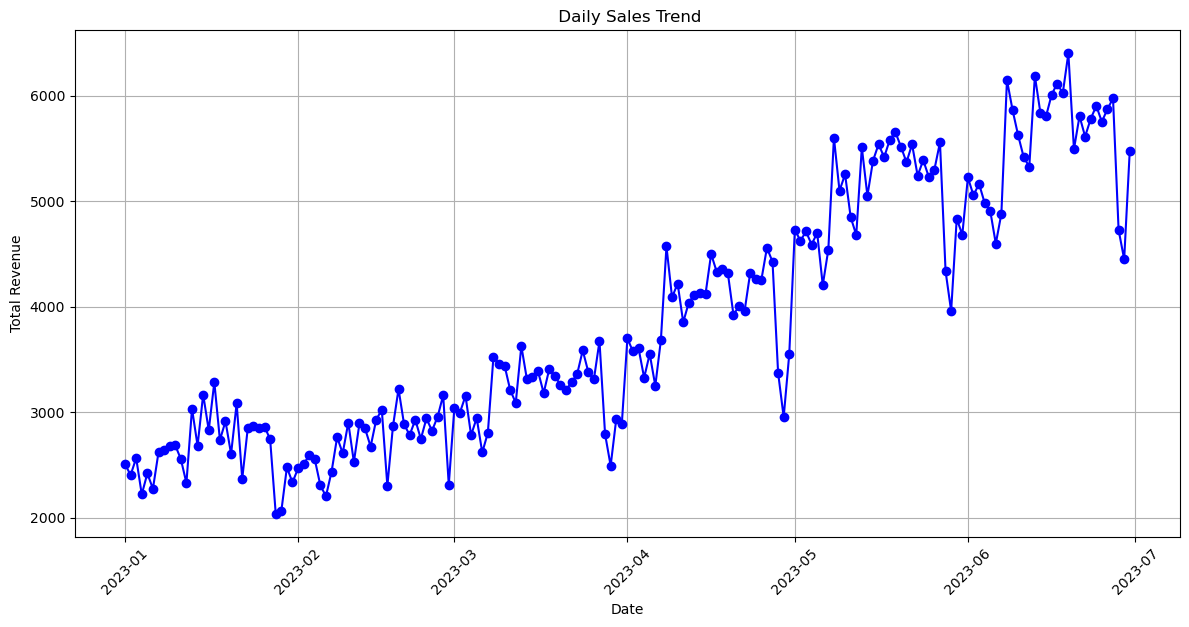

In [17]:
import matplotlib.pyplot as plt
df = pd.read_excel(r"C:\Users\maadh\OneDrive\Desktop\2nd year\excel_ca2_project.xlsx", sheet_name="Transactions")
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['revenue'] = df['transaction_qty'] * df['unit_price']
daily_sales = df.groupby('transaction_date')['revenue'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['transaction_date'], daily_sales['revenue'], color='blue', marker='o', linestyle='-')
plt.title(" Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

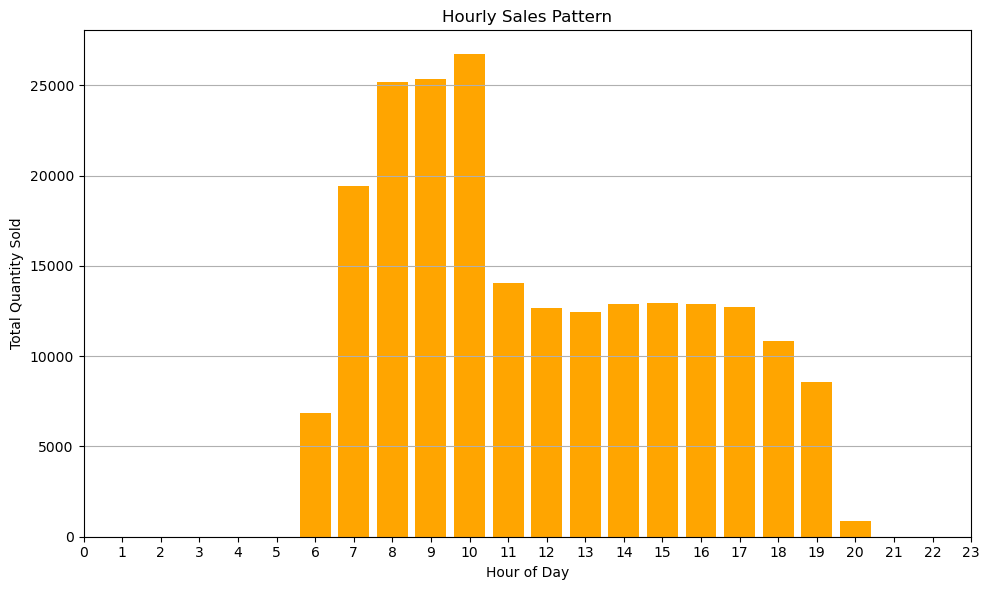

In [19]:
df = pd.read_excel(r"C:\Users\maadh\OneDrive\Desktop\2nd year\excel_ca2_project.xlsx", sheet_name="Transactions")
df['hour'] = df['transaction_time'].apply(lambda x: x.hour)
hourly_sales = df.groupby('hour')['transaction_qty'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(hourly_sales['hour'], hourly_sales['transaction_qty'], color='orange')
plt.title("Hourly Sales Pattern")
plt.xlabel("Hour of Day")
plt.ylabel("Total Quantity Sold")
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

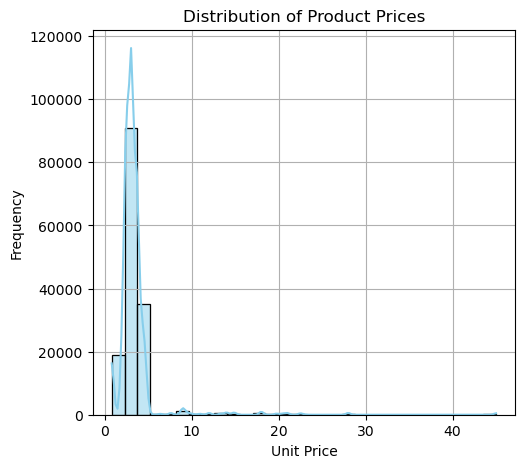

In [21]:
import seaborn as sns
df = pd.read_excel(r"C:\Users\maadh\OneDrive\Desktop\2nd year\excel_ca2_project.xlsx", sheet_name="Transactions")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['unit_price'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Product Prices")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.grid(True)

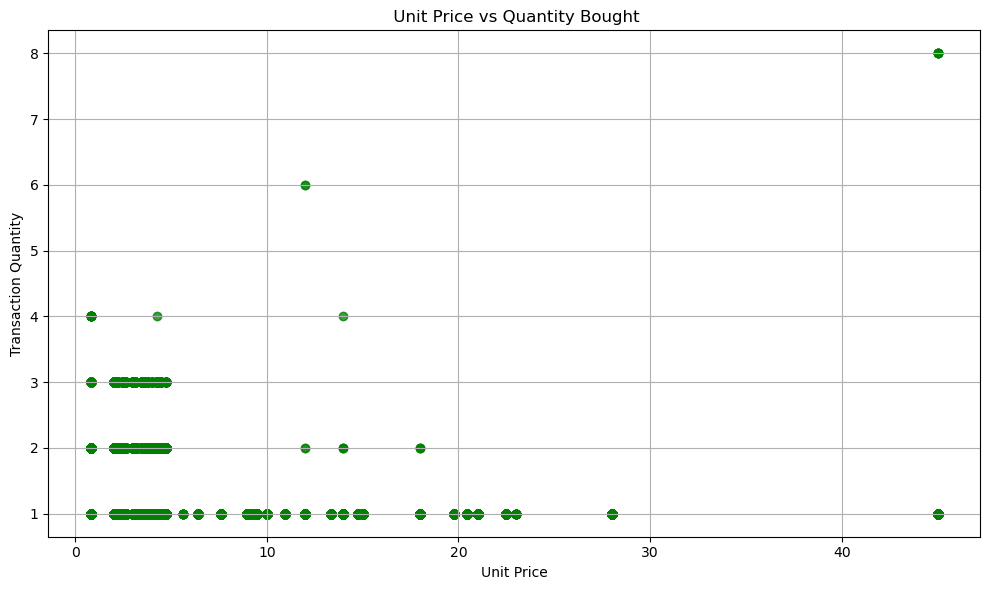

In [23]:
df = pd.read_excel(r"C:\Users\maadh\OneDrive\Desktop\2nd year\excel_ca2_project.xlsx", sheet_name="Transactions")
plt.figure(figsize=(10, 6))
plt.scatter(df['unit_price'], df['transaction_qty'], alpha=0.5, color='green')
plt.title(" Unit Price vs Quantity Bought")
plt.xlabel("Unit Price")
plt.ylabel("Transaction Quantity")
plt.grid(True)
plt.tight_layout()
plt.show()

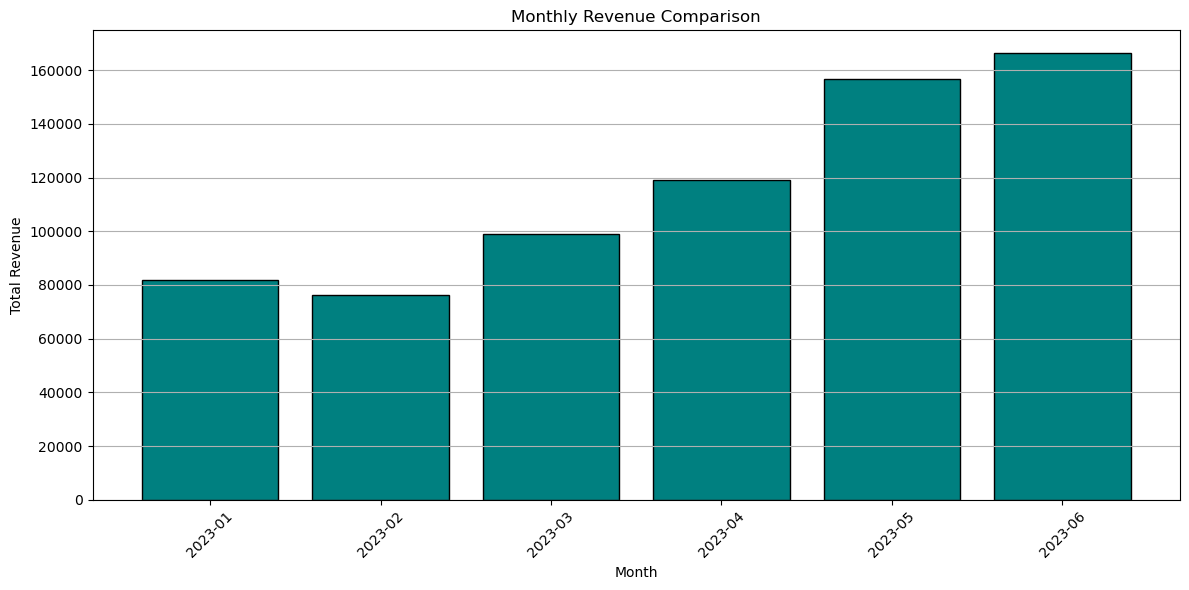

In [25]:
df = pd.read_excel(r"C:\Users\maadh\OneDrive\Desktop\2nd year\excel_ca2_project.xlsx", sheet_name="Transactions")
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['revenue'] = df['unit_price'] * df['transaction_qty']
df['month'] = df['transaction_date'].dt.to_period('M')
monthly_revenue = df.groupby('month')['revenue'].sum().reset_index()
monthly_revenue['month'] = monthly_revenue['month'].astype(str)
plt.figure(figsize=(12, 6))
plt.bar(monthly_revenue['month'], monthly_revenue['revenue'], color='teal', edgecolor='black')
plt.title("Monthly Revenue Comparison")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()